Title: 

Predicting whether a patient is diabetic based on early stage diabetic symptoms.


Introduction: 

Warning signs of diabetes can be so mild that some people don't notice it until there is long-term damage. We will be using the Early stage diabetes risk prediction dataset from the UCI Machine Learning Repository. The dataset contains signs and symptoms of patients that are newly diabetic or would be diabetic. Using this dataset, we can answer the question of: Based on a patient's pre-existing conditions, could they be diabetic? 



Preliminary exploratory data analysis:

In [1]:
library(tidyverse)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)
library(rvest)
library(rsample)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘rvest’ was built under R version 4.0.2”
Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




In [24]:
diabetes_data <- read_csv("diabetes_data_upload.csv")
diabetes_data <- diabetes_data %>%
  mutate(class = as_factor(class))

diabetes_split <- initial_split(diabetes_data, prop=0.75, strata=class)
diabetes_train <- training(diabetes_split)
diabetes_test <- testing(diabetes_split)

Parsed with column specification:
cols(
  Age = col_double(),
  Gender = col_character(),
  Polyuria = col_character(),
  Polydipsia = col_character(),
  `sudden weight loss` = col_character(),
  weakness = col_character(),
  Polyphagia = col_character(),
  `Genital thrush` = col_character(),
  `visual blurring` = col_character(),
  Itching = col_character(),
  Irritability = col_character(),
  `delayed healing` = col_character(),
  `partial paresis` = col_character(),
  `muscle stiffness` = col_character(),
  Alopecia = col_character(),
  Obesity = col_character(),
  class = col_character()
)



In [16]:

num_obs <- nrow(diabetes_train)
diabetes_train %>%
  group_by(class) %>%
  summarize(
    n = n(),
    percentage = n() / num_obs * 100)

`summarise()` ungrouping output (override with `.groups` argument)



class,n,percentage
<fct>,<int>,<dbl>
Positive,240,61.53846
Negative,150,38.46154


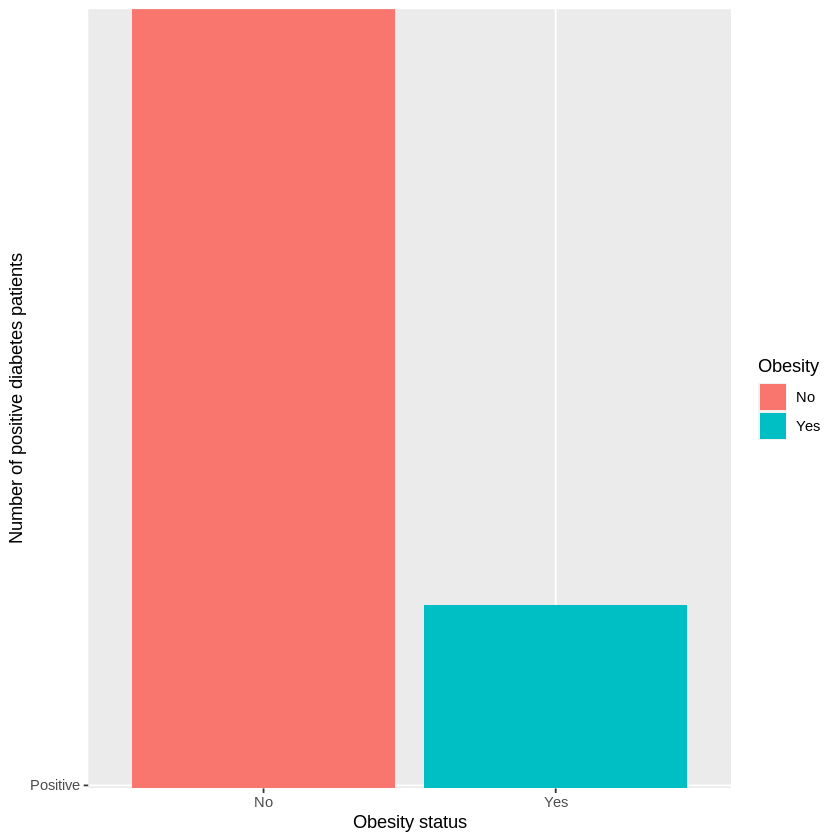

In [31]:
diabetes_data %>%
    select(Obesity, class) %>%
    filter(class=="Positive") %>%
    ggplot( aes(x = Obesity, y = class, fill=Obesity))+
    geom_bar(stat="identity") +
    xlab("Obesity status") +
    ylab("Number of positive diabetes patients")

Methods:

 -We will split diabetes data into test set (25%) and training set (75%) 
 -Using training set to find the best k-nn classifier 
 -Use 2 variables: “visible_blurring” and “polyphagia” to predict “class”. From time to time, disease diagnosis (specifically, diabetes) are predicted from a blur image on radiograph (Vajuhudeen, 2005). In addition, people with diabetes cannot use glucose to synthesize energy for cells, which causes “polyphagia” phenomena (Tarman, 2014). 
 -Then follow forward steps to predict whether the patient is “positive” or “negative” with diabetes 
 -After checking accuracy, we will use line plot to with the best fit K value to visualize our data.
 

 Tarman, V. I., Werdell, P. R., desLibris - Books, & Canadian Electronic Library (Firm). (2014). Food junkies: The truth about food addiction. Dundurn.
 Vajuhudeen, Z. (n.d.). Blur: Radiology reference article. Retrieved March 06, 2021, from https://radiopaedia.org/articles/blur



Expected outcomes and significance:

We expect to find the accuracy of our classification model that predicts whether or not a patient is diabetic. These findings can help us adjust our model accordingly, to build a reliable model to predict diabetic patients. This could lead to future questions such as finding which symptoms are most highly correlated with diabetes.